In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import pandas as pd


In [2]:
import os  # current working directory
os.getcwd()

'C:\\Users\\asma0'

In [3]:
os.chdir(r"C:\Users\asma0\OneDrive\Desktop\Beans_project") ## changing current working directory


In [4]:
import os
os.getcwd()

'C:\\Users\\asma0\\OneDrive\\Desktop\\Beans_project'

In [5]:
df_train = pd.read_csv('C://Users//asma0//OneDrive//Desktop//Beans_project//train.csv')  ## loading train data set

In [6]:
df_train

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0     54180    951.753       388.728347       178.948203      2.172295   
1     42023    746.715       272.962686       196.334047      1.390297   
2     38600    716.517       254.129288       193.991641      1.310001   
3     62298    992.583       327.685094       242.658033      1.350399   
4     74456   1085.466       447.665972       212.382328      2.107831   
...     ...        ...              ...              ...           ...   
9523  55381    914.969       363.142352       194.498350      1.867072   
9524  40987    749.125       272.565043       192.210719      1.418053   
9525  32168    663.090       239.983107       171.160719      1.402092   
9526  53228    920.083       380.325304       178.969940      2.125079   
9527  50330    841.897       324.437513       198.042350      1.638223   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0         0.887741       55014     262.648279  0.580210  0.984840   0.751624   
1         0.694730       42365     231.312225  0.795348  0.991927   0.947081   
2         0.645976       38940     221.691331  0.715265  0.991269   0.944809   
3         0.672032       63353     281.638558  0.801157  0.983347   0.794603   
4         0.880298       75096     307.896612  0.788821  0.991478   0.794104   
...            ...         ...            ...       ...       ...        ...   
9523      0.844473       55974     265.543366  0.765216  0.989406   0.831300   
9524      0.709016       41441     228.443142  0.708701  0.989045   0.917799   
9525      0.700940       32570     202.379766  0.727536  0.987657   0.919367   
9526      0.882362       53905     260.330549  0.653939  0.987441   0.790125   
9527      0.792080       50882     253.144517  0.734316  0.989151   0.892316   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0        0.675660      0.007175      0.000922      0.456517      0.991689   
1        0.847413      0.006496      0.002066      0.718109      0.998386   
2        0.872356      0.006584      0.002352      0.761006      0.996919   
3        0.859479      0.005260      0.001771      0.738705      0.997546   
4        0.687782      0.006012      0.000830      0.473044      0.997097   
...           ...           ...           ...           ...           ...   
9523     0.731238      0.006557      0.001156      0.534709      0.998339   
9524     0.838123      0.006650      0.002024      0.702451      0.996113   
9525     0.843308      0.007460      0.002327      0.711169      0.997125   
9526     0.684494      0.007145      0.000968      0.468533      0.995669   
9527     0.780257      0.006446      0.001474      0.608800      0.997351   

         Class  
0        HOROZ  
1     DERMASON  
2        SEKER  
3     BARBUNYA  
4        HOROZ  
...        ...  
9523     HOROZ  
9524      SIRA  
9525  DERMASON  
9526     HOROZ  
9527      SIRA  

[9528 rows x 17 columns]

In [7]:
###  Pre-processing, data analysis and understanding


In [8]:
df_train.isna().sum() # no null values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
print("Number of bean classes: ", len(df_train['Class'].unique()))  # checking no of unique classes of beans


Number of bean classes:  7


In [10]:
print("List of unique bean classes: ", df_train['Class'].unique())  # names of unique bean classes


List of unique bean classes:  ['HOROZ' 'DERMASON' 'SEKER' 'BARBUNYA' 'SIRA' 'BOMBAY' 'CALI']


In [11]:
print(df_train.shape)  ## checking no. of rows and columns


(9528, 17)


In [12]:
df_train.dtypes  ## checking data types


Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [13]:
df_train.describe() 

Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count    9528.000000  9528.000000      9528.000000      9528.000000   
mean    53255.524664   856.676016       320.572294       202.687297   
std     29609.257209   215.627112        86.225872        45.235551   
min     20464.000000   524.736000       183.965251       122.512653   
25%     36453.750000   704.791500       253.499188       176.261896   
50%     44754.500000   796.506000       297.211791       192.789907   
75%     61444.750000   977.826000       376.865074       217.042845   
max    254616.000000  1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter       Extent  \
count   9528.000000   9528.000000    9528.000000    9528.000000  9528.000000   
mean       1.582178      0.750259   53975.731423     253.496647     0.750049   
std        0.247600      0.092649   30067.830953      59.555540     0.049182   
min        1.036423      0.262774   20772.000000     161.417391     0.555315   
25%        1.430546      0.715089   36844.750000     215.439913     0.719528   
50%        1.549658      0.763926   45290.500000     238.711540     0.760305   
75%        1.706178      0.810235   62391.000000     279.703209     0.787088   
max        2.430306      0.911423  263261.000000     569.374358     0.866195   

          Solidity    roundness  Compactness  ShapeFactor1  ShapeFactor2  \
count  9528.000000  9528.000000  9528.000000   9528.000000   9528.000000   
mean      0.987197     0.873459     0.800216      0.006551      0.001716   
std       0.004600     0.059669     0.062001      0.001129      0.000597   
min       0.919246     0.556766     0.640577      0.002778      0.000564   
25%       0.985704     0.832908     0.762764      0.005899      0.001154   
50%       0.988315     0.883106     0.801603      0.006632      0.001695   
75%       0.990065     0.917196     0.834551      0.007256      0.002172   
max       0.994213     0.990685     0.981611      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count   9528.000000   9528.000000  
mean       0.644190      0.995117  
std        0.099502      0.004259  
min        0.410339      0.947687  
25%        0.581809      0.993739  
50%        0.642568      0.996396  
75%        0.696476      0.997909  
max        0.963560      0.999733

In [14]:
df_train["Class"].value_counts()  ## count of classes

DERMASON    2427
SIRA        1850
SEKER       1468
HOROZ       1341
CALI        1137
BARBUNYA     928
BOMBAY       377
Name: Class, dtype: int64

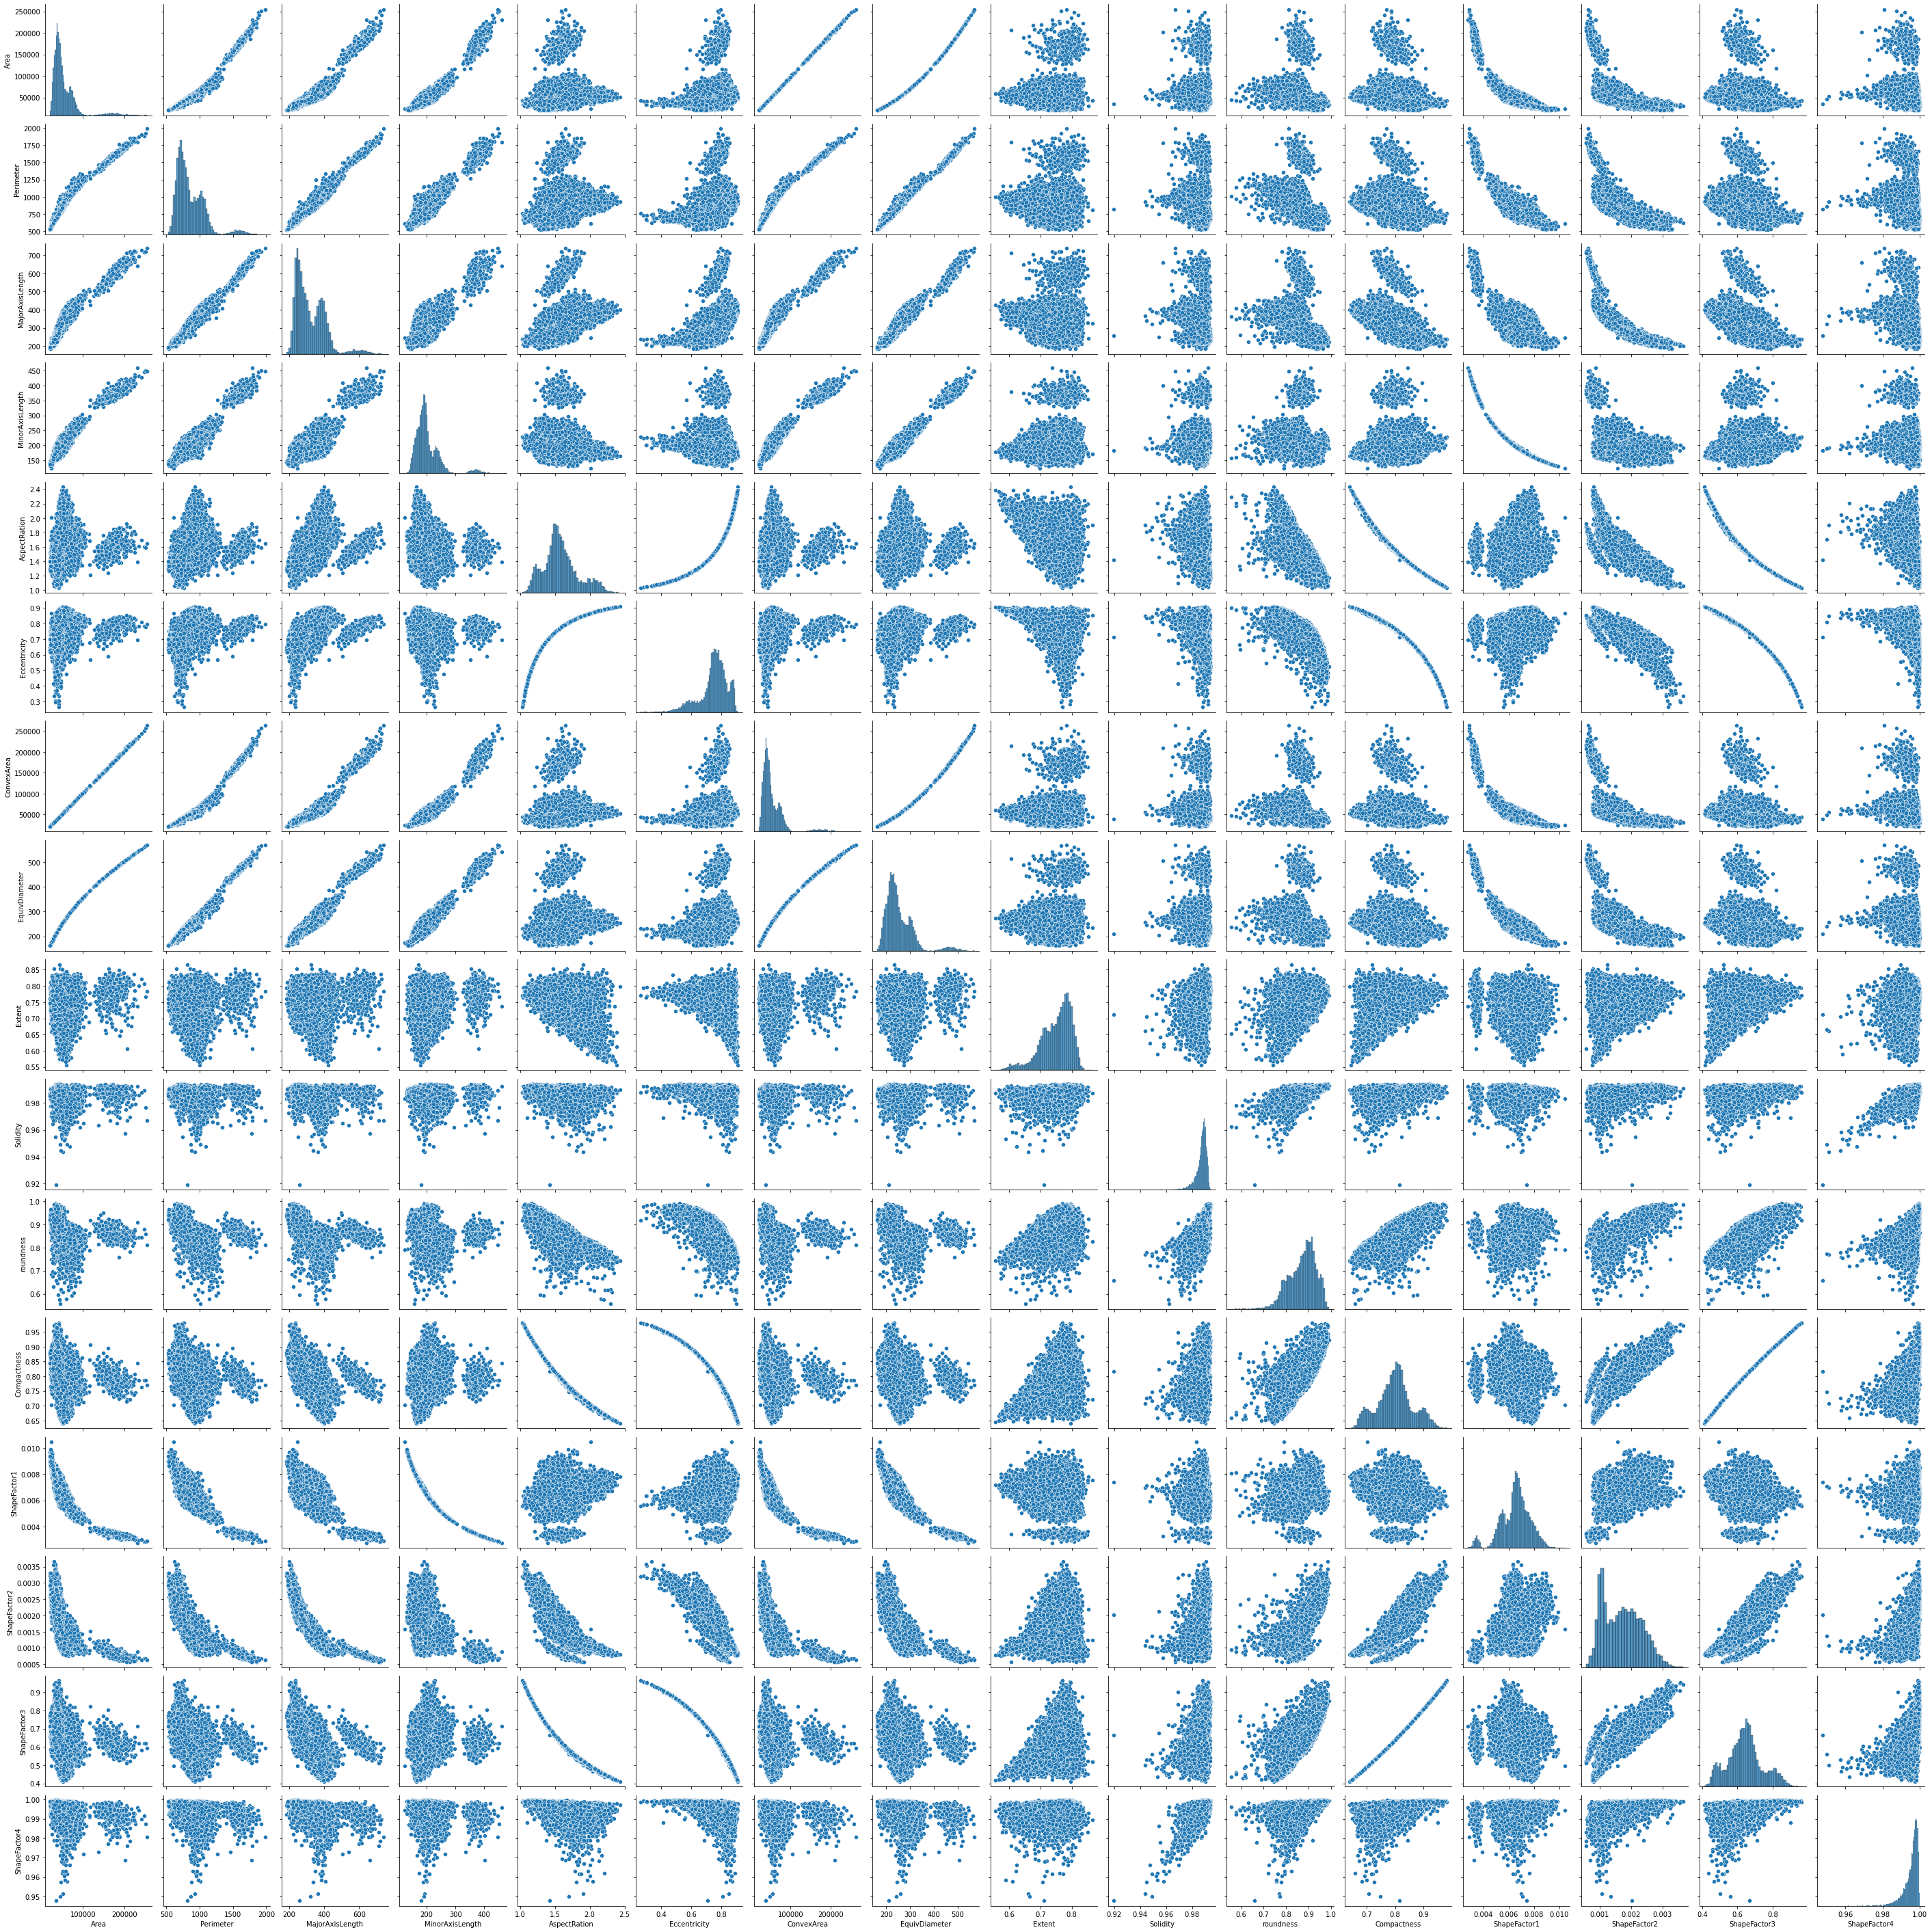

In [15]:
sns.pairplot(df_train)  ## pair plot to check relationship between two variables 

In [16]:
df_train.columns   # names of columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [17]:
train_scatter = df_train[(df_train['Class']=='HOROZ') |   # scatter plot between classes
                    (df_train['Class']=='DERMASON') | 
                    (df_train['Class']=='SEKER') |
                    (df_train['Class']=='BARBUNYA') |
                    (df_train['Class']=='SIRA') |
                    (df_train['Class']=='CALI')]
                   
fig = px.scatter(train_scatter, x="Area", y="Perimeter", color="Class", symbol="Class")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [18]:
### Transformation and feature selection techniques

In [19]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [20]:
## Checking Multicollinearity 1 = not correlated. Between 1 and 5 = moderately correlated. Greater than 5 = highly correlated##

    
X = df_train.iloc[:,:-1]
calc_vif(X)

variables           VIF
0              Area  3.236644e+05
1         Perimeter  5.747803e+04
2   MajorAxisLength  1.342157e+06
3   MinorAxisLength  1.700137e+06
4      AspectRation  1.702179e+05
5      Eccentricity  2.311018e+04
6        ConvexArea  3.098018e+05
7     EquivDiameter  6.236817e+06
8            Extent  2.932107e+02
9          Solidity  6.051844e+05
10        roundness  2.150721e+04
11      Compactness  2.552889e+06
12     ShapeFactor1  2.130123e+04
13     ShapeFactor2  1.167565e+04
14     ShapeFactor3  5.557267e+05
15     ShapeFactor4  3.169711e+06

In [21]:
df_train.drop('EquivDiameter', inplace=True, axis=1)
  # Remove EquivDiameter




In [22]:
df_train.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [23]:
## Checking Multicollinearity after removing EquivDiameter

    
X = df_train.iloc[:,:-1]
calc_vif(X)

variables           VIF
0              Area  2.117495e+05
1         Perimeter  5.553300e+04
2   MajorAxisLength  6.806774e+04
3   MinorAxisLength  3.671897e+04
4      AspectRation  3.990438e+04
5      Eccentricity  2.284401e+04
6        ConvexArea  2.059571e+05
7            Extent  2.931977e+02
8          Solidity  5.111401e+05
9         roundness  2.105803e+04
10      Compactness  1.754517e+06
11     ShapeFactor1  1.771881e+04
12     ShapeFactor2  1.005651e+04
13     ShapeFactor3  5.465707e+05
14     ShapeFactor4  3.020947e+05

In [24]:
df_train.shape  # no. of new columns and rows


(9528, 16)

In [25]:
df_train.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

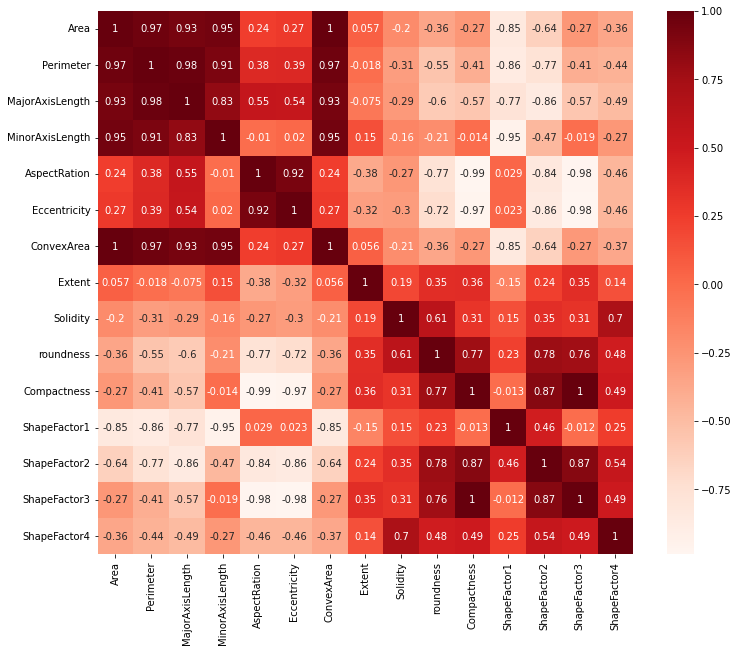

In [26]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.


In [27]:
### Feature engineering techniques

In [28]:
### detecting outliers

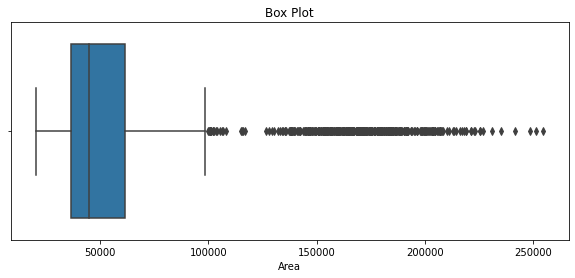

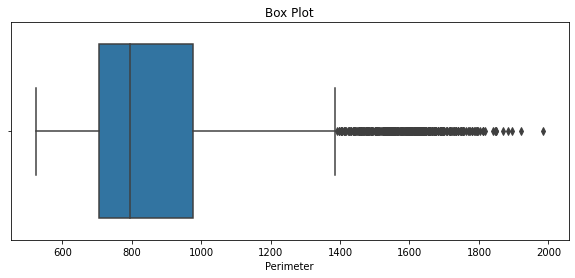

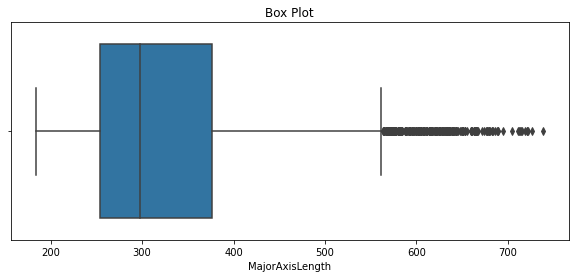

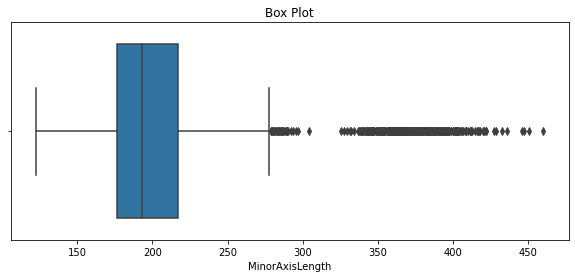

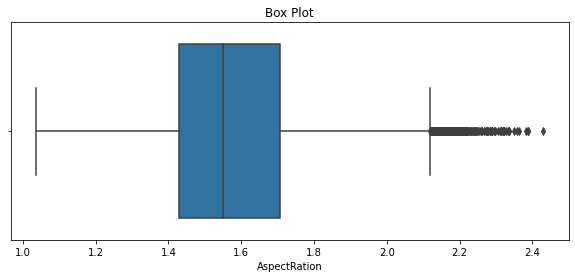

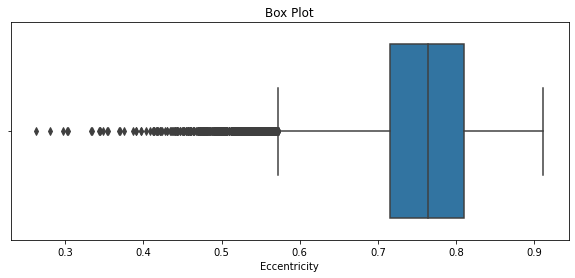

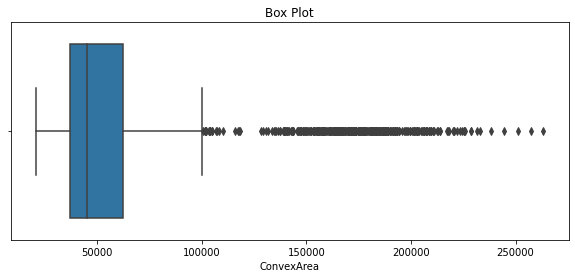

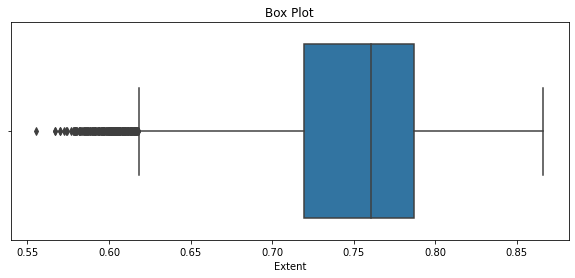

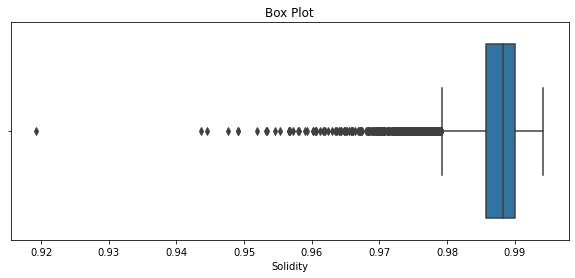

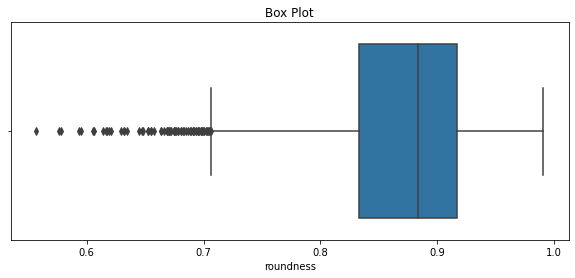

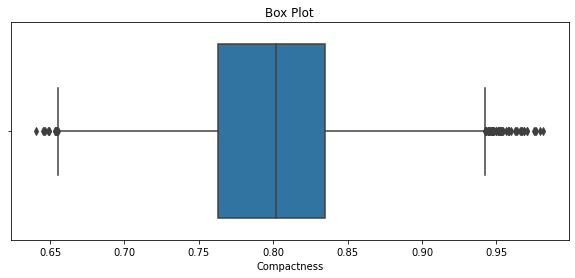

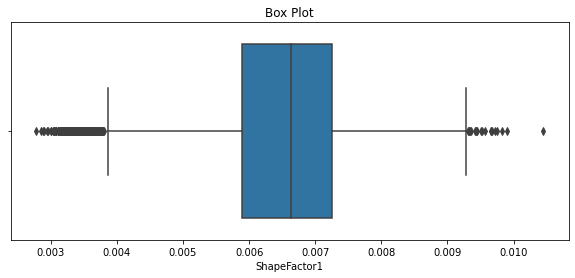

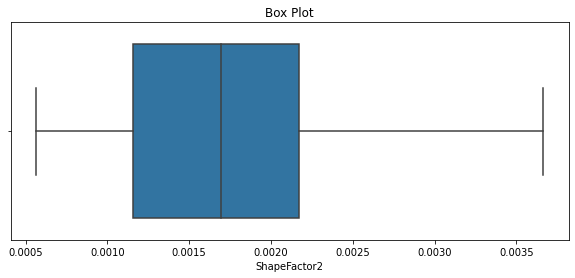

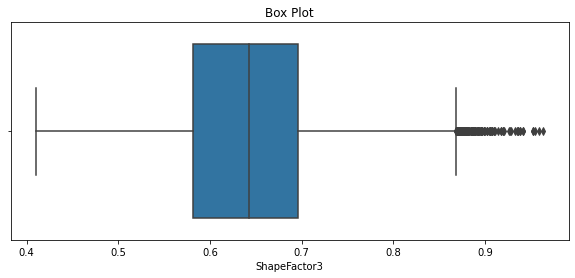

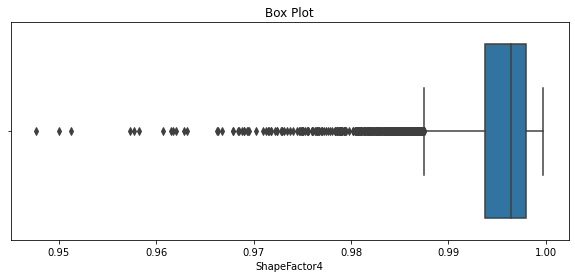

In [29]:
def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['Area'])    # Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['Perimeter'])  # Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['MajorAxisLength']) # Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['MinorAxisLength']) # Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['AspectRation']) # Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['Eccentricity']) # Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['ConvexArea']) # Outliers present


def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['Extent']) # Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['Solidity']) # Outliers present


def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['roundness']) # Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['Compactness']) # Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['ShapeFactor1']) # Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['ShapeFactor2']) # No Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['ShapeFactor3']) # Outliers present

def Box_plots(df_train):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df_train)
    plt.show()
Box_plots(df_train['ShapeFactor4'])  # Outliers present

In [30]:
## outliers treatment
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_train.shape)

Area               24991.000000
Perimeter            273.034500
MajorAxisLength      123.365886
MinorAxisLength       40.780949
AspectRation           0.275632
Eccentricity           0.095146
ConvexArea         25546.250000
Extent                 0.067560
Solidity               0.004360
roundness              0.084288
Compactness            0.071787
ShapeFactor1           0.001357
ShapeFactor2           0.001018
ShapeFactor3           0.114666
ShapeFactor4           0.004170
dtype: float64
(7395, 16)


In [31]:
# Normalization of data

cols_to_norm = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
    
df_train[cols_to_norm] = df_train[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [32]:
df_train.shape  ## new shape

(7395, 16)

In [33]:
main_df=df_train.copy()  ## copy of new train data

In [34]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [35]:
test_df.shape  # shape of test data

(3213, 16)

In [36]:
test_df.head()


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  0.146482   0.175414         0.153681         0.285545      0.095937   
1  0.152646   0.184560         0.136196         0.334506      0.009144   
2  0.157295   0.171606         0.138629         0.343989      0.003666   
3  0.165300   0.179068         0.173144         0.309981      0.104420   
4  0.165457   0.171551         0.149307         0.351107      0.015616   

   Eccentricity  ConvexArea    Extent  Solidity  roundness  Compactness  \
0      0.227720    0.146914  0.627608  0.538662   0.793813     0.863873   
1      0.025062    0.153664  0.652041  0.450823   0.773142     0.986392   
2      0.010147    0.156250  0.641130  0.770627   0.915194     0.995641   
3      0.244690    0.163570  0.736671  0.873991   0.921026     0.852667   
4      0.042304    0.163815  0.659329  0.860430   0.984426     0.976912   

   ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0      0.549553      0.722333      0.847499      0.957447  SEKER  
1      0.492940      0.814561      0.984523      0.925250  SEKER  
2      0.481587      0.816030      0.995037      0.968145  SEKER  
3      0.520268      0.690477      0.835175      0.968064  SEKER  
4      0.474423      0.789653      0.973771      0.929828  SEKER

In [37]:
final_df=pd.concat([df_train,test_df],axis=0)   # train and test data


In [38]:
final_df['Class']  ## classes in train and test data


1       DERMASON
2          SEKER
3       BARBUNYA
4          HOROZ
5          SEKER
          ...   
3208    DERMASON
3209    DERMASON
3210    DERMASON
3211    DERMASON
3212    DERMASON
Name: Class, Length: 10608, dtype: object

In [39]:
final_df.shape  # shape of combined data sets

(10608, 16)

In [40]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]  ## removing if tgh there is any duplicate value


In [41]:
final_df.shape


(10608, 16)

In [42]:
final_df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
1     0.276305   0.305300         0.298565         0.419938      0.189901   
2     0.232264   0.263767         0.235383         0.403202      0.100610   
3     0.537171   0.643457         0.482145         0.750915      0.145533   
4     0.693600   0.771204         0.884651         0.534600      0.987809   
5     0.169437   0.192037         0.159878         0.343624      0.031229   
...        ...        ...              ...              ...           ...   
3208  0.281537   0.309228         0.296507         0.436056      0.182482   
3209  0.281916   0.312177         0.322342         0.397749      0.270907   
3210  0.281968   0.336922         0.380924         0.315557      0.484302   
3211  0.282726   0.313837         0.310208         0.417231      0.227058   
3212  0.283130   0.309575         0.326486         0.394142      0.282488   

      Eccentricity  ConvexArea    Extent  Solidity  roundness  Compactness  \
1         0.395659    0.272472  0.714277  0.855543   0.878350     0.739724   
2         0.238000    0.229147  0.391306  0.811387   0.870050     0.851837   
3         0.322260    0.537961  0.737707  0.280365   0.321280     0.793957   
4         0.995736    0.686505  0.687953  0.825395   0.319455     0.022220   
5         0.082699    0.166468  0.596829  0.868070   0.925360     0.951537   
...            ...         ...       ...       ...        ...          ...   
3208      0.382875    0.280327  0.461506  0.782205   0.786832     0.748325   
3209      0.508518    0.281065  0.416570  0.739452   0.769128     0.643439   
3210      0.724895    0.282681  0.433811  0.553666   0.607667     0.423240   
3211      0.449681    0.281569  0.497017  0.775783   0.762944     0.695370   
3212      0.523051    0.282034  0.788139  0.768530   0.794461     0.631058   

      ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4     Class  
1         0.402834      0.498075      0.712752      0.889825  DERMASON  
2         0.421682      0.613176      0.834156      0.769841     SEKER  
3         0.138518      0.378949      0.771040      0.821147  BARBUNYA  
4         0.299498      0.000000      0.019176      0.784425     HOROZ  
5         0.482851      0.758788      0.945077      0.885635     SEKER  
...            ...           ...           ...           ...       ...  
3208      0.388639      0.506101      0.722101      0.826409  DERMASON  
3209      0.426376      0.439282      0.611493      0.851151  DERMASON  
3210      0.513935      0.311280      0.389250      0.959810  DERMASON  
3211      0.406177      0.471173      0.665875      0.882682  DERMASON  
3212      0.429477      0.430831      0.598639      0.886159  DERMASON  

[10608 rows x 16 columns]

In [43]:
#### Model building

In [44]:
df_Train=final_df.iloc[:7395,:]
df_Test=final_df.iloc[7395:,:]

In [45]:
df_Train.head()


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
1  0.276305   0.305300         0.298565         0.419938      0.189901   
2  0.232264   0.263767         0.235383         0.403202      0.100610   
3  0.537171   0.643457         0.482145         0.750915      0.145533   
4  0.693600   0.771204         0.884651         0.534600      0.987809   
5  0.169437   0.192037         0.159878         0.343624      0.031229   

   Eccentricity  ConvexArea    Extent  Solidity  roundness  Compactness  \
1      0.395659    0.272472  0.714277  0.855543   0.878350     0.739724   
2      0.238000    0.229147  0.391306  0.811387   0.870050     0.851837   
3      0.322260    0.537961  0.737707  0.280365   0.321280     0.793957   
4      0.995736    0.686505  0.687953  0.825395   0.319455     0.022220   
5      0.082699    0.166468  0.596829  0.868070   0.925360     0.951537   

   ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4     Class  
1      0.402834      0.498075      0.712752      0.889825  DERMASON  
2      0.421682      0.613176      0.834156      0.769841     SEKER  
3      0.138518      0.378949      0.771040      0.821147  BARBUNYA  
4      0.299498      0.000000      0.019176      0.784425     HOROZ  
5      0.482851      0.758788      0.945077      0.885635     SEKER

In [46]:
df_Test.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  0.146482   0.175414         0.153681         0.285545      0.095937   
1  0.152646   0.184560         0.136196         0.334506      0.009144   
2  0.157295   0.171606         0.138629         0.343989      0.003666   
3  0.165300   0.179068         0.173144         0.309981      0.104420   
4  0.165457   0.171551         0.149307         0.351107      0.015616   

   Eccentricity  ConvexArea    Extent  Solidity  roundness  Compactness  \
0      0.227720    0.146914  0.627608  0.538662   0.793813     0.863873   
1      0.025062    0.153664  0.652041  0.450823   0.773142     0.986392   
2      0.010147    0.156250  0.641130  0.770627   0.915194     0.995641   
3      0.244690    0.163570  0.736671  0.873991   0.921026     0.852667   
4      0.042304    0.163815  0.659329  0.860430   0.984426     0.976912   

   ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0      0.549553      0.722333      0.847499      0.957447  SEKER  
1      0.492940      0.814561      0.984523      0.925250  SEKER  
2      0.481587      0.816030      0.995037      0.968145  SEKER  
3      0.520268      0.690477      0.835175      0.968064  SEKER  
4      0.474423      0.789653      0.973771      0.929828  SEKER

In [47]:
Xtrain=df_Train.drop(['Class'],axis=1)  ## input
Ytrain=df_Train['Class']   ## output

In [48]:
Xtest=df_Test.drop(['Class'],axis=1)  ## input
Ytest=df_Test['Class']   # Actual output

In [49]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [50]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))


DecisionTrees's Accuracy is:  88.88888888888889
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.78      0.85       322
        CALI       0.82      0.96      0.89       366
    DERMASON       0.90      0.93      0.92      1098
       HOROZ       0.99      0.91      0.95       340
       SEKER       0.88      0.87      0.87       314
        SIRA       0.85      0.84      0.85       773

    accuracy                           0.89      3213
   macro avg       0.90      0.88      0.89      3213
weighted avg       0.89      0.89      0.89      3213



In [51]:
# Evaluation on Train data
accuracy_score(Ytrain, DecisionTree.predict(Xtrain))   

0.8927653820148749

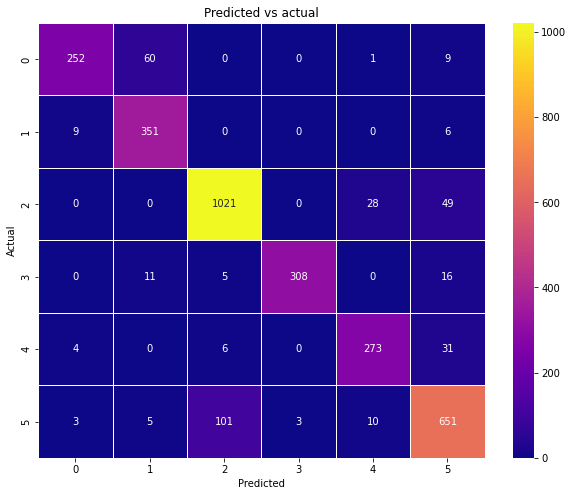

In [52]:
#creating a confusion matrix for predicted and actual values
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='plasma', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [53]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [54]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


Naive Bayes's Accuracy is:  0.8811079987550576
              precision    recall  f1-score   support

    BARBUNYA       0.89      0.82      0.85       322
        CALI       0.86      0.91      0.88       366
    DERMASON       0.95      0.85      0.90      1098
       HOROZ       0.92      0.96      0.94       340
       SEKER       0.82      0.93      0.87       314
        SIRA       0.82      0.88      0.85       773

    accuracy                           0.88      3213
   macro avg       0.88      0.89      0.88      3213
weighted avg       0.89      0.88      0.88      3213



In [55]:
# Evaluation on train Data
accuracy_score(Ytrain, NaiveBayes.predict(Xtrain)) 


0.8799188640973631

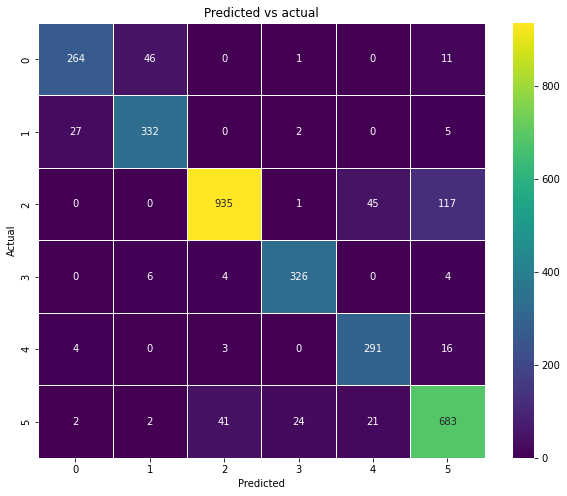

In [56]:
cm_rf = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [57]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [58]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9156551509492686
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.92      0.94       322
        CALI       0.94      0.96      0.95       366
    DERMASON       0.95      0.89      0.92      1098
       HOROZ       0.97      0.94      0.96       340
       SEKER       0.89      0.91      0.90       314
        SIRA       0.84      0.91      0.87       773

    accuracy                           0.92      3213
   macro avg       0.93      0.92      0.92      3213
weighted avg       0.92      0.92      0.92      3213



In [59]:
# Evaluation on Train data
accuracy_score(Ytrain, SVM.predict(Xtrain))   

0.9076402974983097

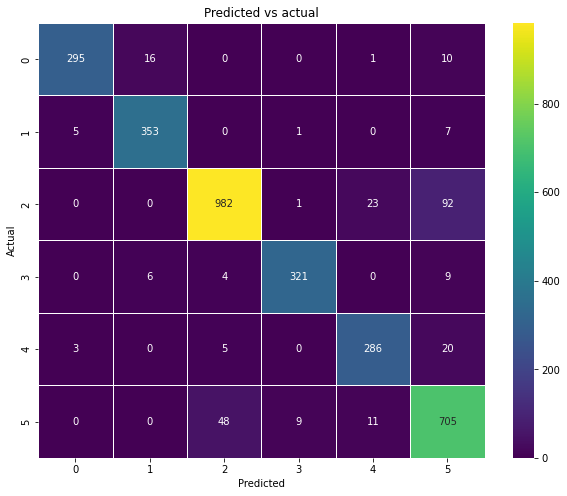

In [60]:
cm_rf = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [61]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9137877373171491
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.94       322
        CALI       0.94      0.95      0.95       366
    DERMASON       0.95      0.89      0.92      1098
       HOROZ       0.96      0.94      0.95       340
       SEKER       0.87      0.92      0.89       314
        SIRA       0.84      0.91      0.87       773

    accuracy                           0.91      3213
   macro avg       0.92      0.92      0.92      3213
weighted avg       0.92      0.91      0.91      3213



In [62]:
# Evaluation on Train data
accuracy_score(Ytrain, LogReg.predict(Xtrain))  

0.9104800540906017

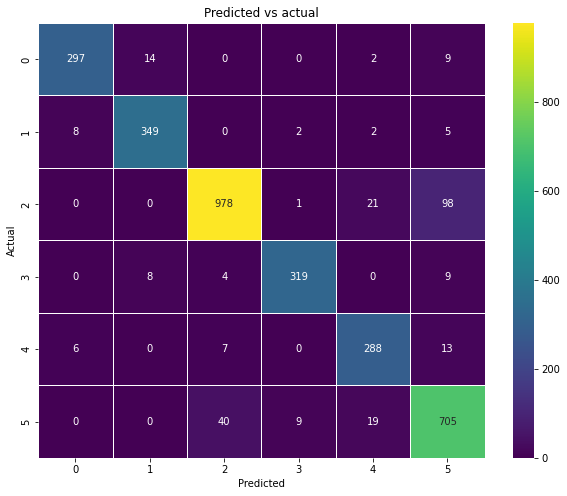

In [63]:
cm_rf = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [64]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [65]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9119203236850296
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.92      0.93       322
        CALI       0.93      0.95      0.94       366
    DERMASON       0.92      0.92      0.92      1098
       HOROZ       0.98      0.92      0.95       340
       SEKER       0.86      0.95      0.90       314
        SIRA       0.88      0.86      0.87       773

    accuracy                           0.91      3213
   macro avg       0.92      0.92      0.92      3213
weighted avg       0.91      0.91      0.91      3213



In [66]:
# Evaluation on Train data
accuracy_score(Ytrain, RF.predict(Xtrain))  

0.9971602434077079

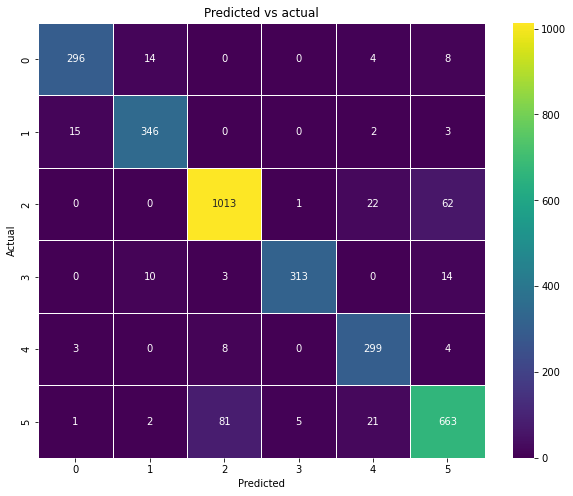

In [67]:
cm_rf = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [68]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [69]:
#K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(Xtrain,Ytrain)

predicted_values = knn.predict(Xtest)

acc_knn = metrics.accuracy_score(Ytest,predicted_values)
acc.append(acc_knn)
model.append('K Nearest Neighbours')
print("Accuracy of KNN is :  ", acc_knn*100)

print(classification_report(Ytest,predicted_values))

Accuracy of KNN is :   90.5073140367258
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       322
        CALI       0.92      0.95      0.93       366
    DERMASON       0.93      0.90      0.91      1098
       HOROZ       0.96      0.92      0.94       340
       SEKER       0.88      0.93      0.90       314
        SIRA       0.84      0.87      0.86       773

    accuracy                           0.91      3213
   macro avg       0.91      0.91      0.91      3213
weighted avg       0.91      0.91      0.91      3213



In [70]:
import pickle
# Dump the trained K Nearest Neighbours model with Pickle
knn_pkl_filename = 'knn.pkl'
# Open the file to save as pkl file
knn_Model_pkl = open(knn_pkl_filename, 'wb')
pickle.dump(knn, knn_Model_pkl)
# Close the pickle instances
knn_Model_pkl.close()

In [71]:
# Evaluation on Train data
accuracy_score(Ytrain, knn.predict(Xtrain)) 

0.9319810682893848

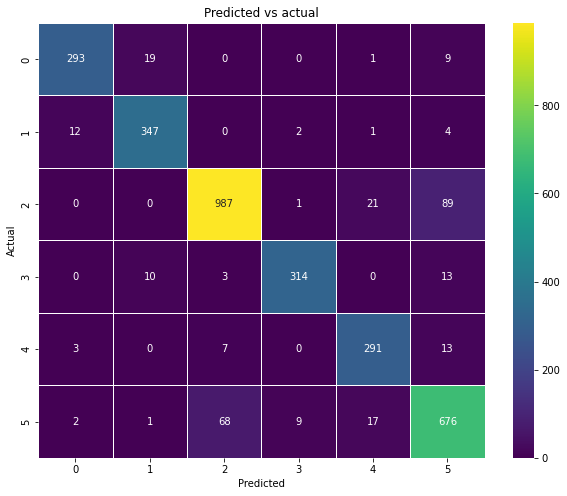

In [72]:
cm_rf = confusion_matrix(Ytest,predicted_values)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [73]:
#### Finding the best fit

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

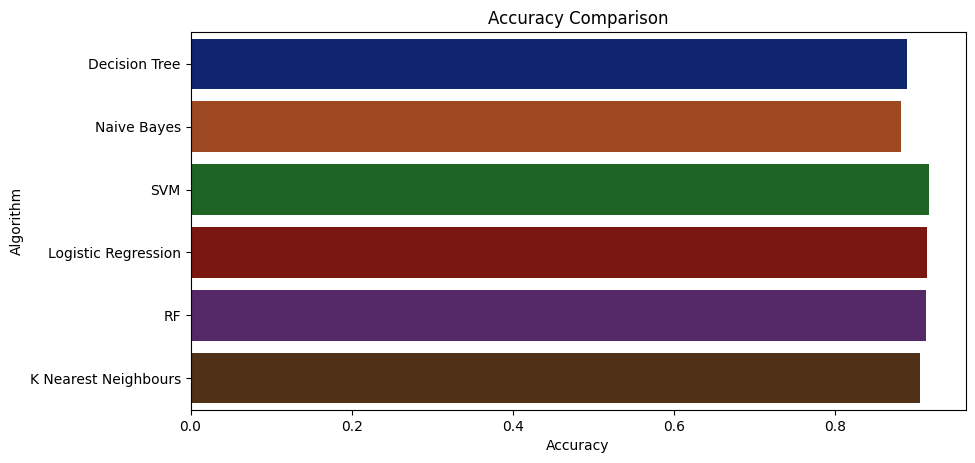

In [74]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [75]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8888888888888888
Naive Bayes --> 0.8811079987550576
SVM --> 0.9156551509492686
Logistic Regression --> 0.9137877373171491
RF --> 0.9119203236850296
K Nearest Neighbours --> 0.905073140367258


In [76]:
data = np.array([[2022,1, 0, 22.04495, 210871, 878.6291667, 1.0, 1.0, 1.0, 1.0, 65, 8, 90, 67, 89 ]])
prediction = NaiveBayes.predict(data)
print(prediction)

['BARBUNYA']
